In [49]:
import h5py
import allel
import pandas
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
callset = h5py.File('/kwiat/2/coluzzi/ag1000g/data/phase2/release/AR1.rc1/variation/main/hdf5/raw/ag1000g.phase2.ar1.h5', mode='r')
callset

<HDF5 file "ag1000g.phase2.ar1.h5" (mode r)>

In [29]:
df_samples = pandas.DataFrame.from_csv('/kwiat/2/coluzzi/ag1000g/data/phase2/release/AR1.rc1/samples/tbl_samples.txt',sep='\t')
df_samples.reset_index(inplace=True)

In [30]:
df_samples.population.value_counts()

CMS    297
UGS    112
BFS     92
GWA     91
AOM     78
BFM     75
CIM     71
GAS     69
GMU     65
GHM     55
KES     48
GNS     39
FRS     24
GHS     12
GQS      9
GNM      4
GNA      1
Name: population, dtype: int64

In [31]:
sample_indices = df_samples[df_samples.population == 'CMS'].index.values
sample_indices[:5]

array([550, 551, 552, 553, 554])

In [32]:
sample_indices_ds = random.sample(sample_indices.tolist(), 50)

In [33]:
sample_indices_ds[:5]

[832, 562, 703, 658, 787]

In [34]:
genotype = allel.GenotypeChunkedArray(callset['3L/calldata/genotype'])
genotype

,0,1,2,3,4,...,1137,1138,1139,1140,1141
0,./.,./.,./.,./.,./.,...,./.,./.,./.,./.,./.
1,./.,./.,./.,./.,./.,...,./.,./.,./.,./.,./.
2,./.,./.,./.,./.,./.,...,./.,./.,./.,./.,./.
3,./.,./.,./.,./.,./.,...,./.,./.,./.,./.,./.
4,./.,./.,./.,./.,./.,...,./.,./.,./.,./.,./.


In [35]:
filter_pass = callset['3L/variants/FILTER_PASS'][:]
filter_pass

array([False, False, False, ..., False, False, False], dtype=bool)

In [36]:
pos = callset['3L/variants/POS'][:]

In [37]:
pos_subset = pos.compress(filter_pass)
pos_subset

array([    9790,     9791,     9798, ..., 41956541, 41956551, 41956556], dtype=int32)

In [38]:
genotype_subset = genotype.subset(filter_pass, sample_indices_ds)
genotype_subset

,0,1,2,3,4,...,45,46,47,48,49
0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
1,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
2,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
3,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
4,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0


In [39]:
ac = genotype_subset.count_alleles(max_allele=3)
ac

,0,1,2,3
0,99,1,0,0
1,100,0,0,0
2,100,0,0,0
3,100,0,0,0
4,100,0,0,0


In [40]:
accessibility = h5py.File('/kwiat/2/coluzzi/ag1000g/data/phase2/release/AR1.rc1/accessibility/accessibility.h5')
accessibility

<HDF5 file "accessibility.h5" (mode r)>

In [47]:
is_accessible = accessibility['3L']['is_accessible'][:]

In [52]:
windows = allel.stats.equally_accessible_windows(is_accessible, 20000)
windows

array([[    9779,   137975],
       [  137976,   295142],
       [  295143,   370100],
       ..., 
       [41854291, 41885924],
       [41885925, 41913148],
       [41913149, 41946443]])

In [53]:
pi, _, _, _ = allel.stats.windowed_diversity(pos_subset, ac, windows=windows, is_accessible=is_accessible)

In [54]:
x = np.mean(windows, axis=1)
y = pi

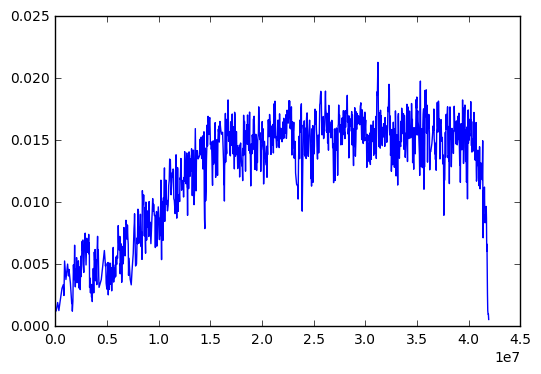

In [55]:
plt.plot(x, y);

# okay, looks okay - so am I stupid and is it just an effect of pop-size?

In [56]:
genotype_subset = genotype.subset(filter_pass)
genotype_subset

,0,1,2,3,4,...,1137,1138,1139,1140,1141
0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
1,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
2,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
3,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
4,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0


In [57]:
ac = genotype_subset.count_alleles(max_allele=3)
ac

,0,1,2,3
0,2279,5,0,0
1,2283,1,0,0
2,2283,1,0,0
3,2282,2,0,0
4,2283,1,0,0


In [58]:
pi, _, _, _ = allel.stats.windowed_diversity(pos_subset, ac, windows=windows, is_accessible=is_accessible)
x = np.mean(windows, axis=1)
y = pi

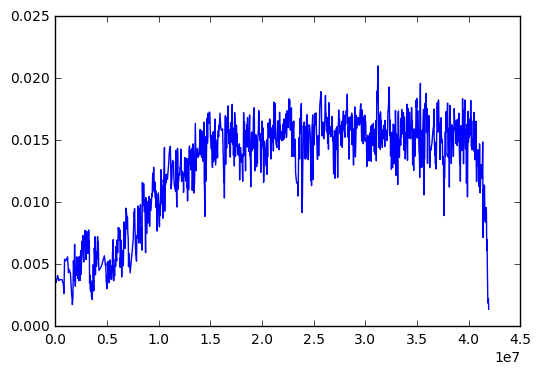

In [59]:
plt.plot(x, y);

# so h5 looks okay. Lets check the allele_counts.h5

In [60]:
allele_counts_fn = '/data/coluzzi/ag1000g/data/phase2/release/AR1.rc1/extras/allele_counts.h5'
ac_all = h5py.File(allele_counts_fn, mode = 'r')

In [81]:
ac_tbl = allel.AlleleCountsChunkedArray(ac_all['3L']['CMS'])
ac_tbl

,0,1,2,3
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [87]:
ac = ac_tbl.subset(sel0 = filter_pass, sel1=None)

In [89]:
ac

,0,1,2,3
0,591,3,0,0
1,594,0,0,0
2,594,0,0,0
3,592,2,0,0
4,594,0,0,0


In [90]:
pi, _, _, _ = allel.stats.windowed_diversity(pos_subset, ac, windows=windows, is_accessible=is_accessible)
x = np.mean(windows, axis=1)
y = pi

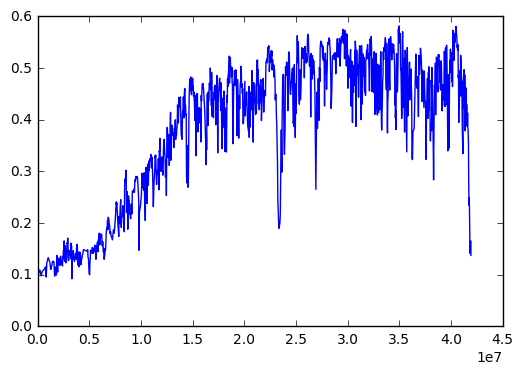

In [91]:
plt.plot(x, y);

# So something has gone very wrong with the allele_counts.h5
- and therefore the allele_frequencies, stuff for panoptes and the windowed diversity files...XMAS JOY!

## lets break down the allele_counts code

In [92]:
%run imports.ipynb
%run utility_functions.ipynb

2016-12-21 17:29:11.075954 :: AgamP4 reference genome not available


In [111]:
callset_fn = '/data/coluzzi/ag1000g/data/phase2/release/AR1.rc1/variation/main/hdf5/raw/ag1000g.phase2.ar1.h5'
callset = h5py.File(callset_fn, mode='r')

fasta_fn = '/data/coluzzi/ag1000g/data/phase2/release/AR1.rc1/genome/agamP3/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP3.fa'
genome = pyfasta.Fasta(fasta_fn, key_fn=lambda k: k.split()[0])

df_samples = pandas.read_csv('/data/coluzzi/ag1000g/data/phase2/release/AR1.rc1/samples/tbl_samples.txt', delimiter='\t')
samples = list(df_samples['ox_code'])
subpop_ids = sorted(df_samples.population.unique())
subpops = {pid: list(df_samples[df_samples.population == pid].index) for pid in subpop_ids}

In [112]:
subpops['all'] = list(range(len(samples)))
print([(k, len(subpops[k])) for k in subpops])

[('GHS', 12), ('GNM', 4), ('GMU', 65), ('GNS', 39), ('GAS', 69), ('BFM', 75), ('GNA', 1), ('FRS', 24), ('CMS', 297), ('GHM', 55), ('KES', 48), ('GWA', 91), ('AOM', 78), ('UGS', 112), ('CIM', 71), ('GQS', 9), ('all', 1142), ('BFS', 92)]


In [120]:
def compute_subpops_ac():
    for chrom in '3L',:
        
        log(chrom, 'load genotypes')
        genotype = allel.GenotypeChunkedArray(callset[chrom]['calldata']['genotype'])
        
        log(chrom, 'count alleles')
        subpops_ac = genotype.count_alleles(max_allele=3, subpop = subpops['CMS'])
        
        return subpops_ac
    
        log(chrom, 'all done')
        
just_CMS_ac = compute_subpops_ac()

2016-12-21 17:47:35.249733 :: 3L load genotypes
2016-12-21 17:47:35.258511 :: 3L count alleles


In [121]:
just_CMS_ac

,0,1,2,3
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [123]:
ac = just_CMS_ac.subset(sel0 = filter_pass, sel1=None)

In [126]:
ac

,0,1,2,3
0,591,3,0,0
1,594,0,0,0
2,594,0,0,0
3,592,2,0,0
4,594,0,0,0


In [124]:
pi, _, _, _ = allel.stats.windowed_diversity(pos_subset, ac, windows=windows, is_accessible=is_accessible)
x = np.mean(windows, axis=1)
y = pi

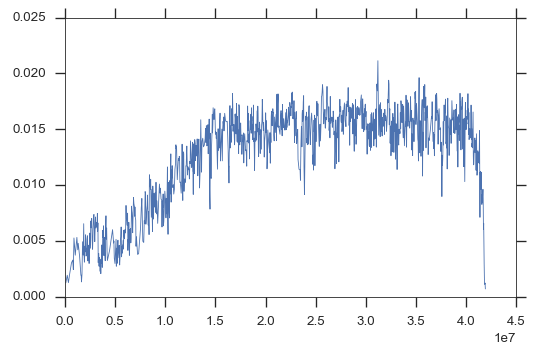

In [125]:
plt.plot(x, y);

## okay, so looks about right, but I didn't use count_allele_subpops so it still could be something going wrong with the dictionary it gets fed
- lets try again with a small dictionary and count_allele_subpops

In [130]:
just_CMS_dict = {}
just_CMS_dict['CMS'] = subpops['CMS']
len(just_CMS_dict['CMS'])

297

In [131]:
def compute_subpops_ac():
    for chrom in '3L',:
        
        log(chrom, 'load genotypes')
        genotype = allel.GenotypeChunkedArray(callset[chrom]['calldata']['genotype'])
        
        log(chrom, 'count alleles')
        subpops_ac = genotype.count_alleles_subpops(just_CMS_dict, max_allele=3)
        
        return subpops_ac
    
        log(chrom, 'all done')
        
just_CMS_dict_ac = compute_subpops_ac()

2016-12-21 18:19:51.903751 :: 3L load genotypes
2016-12-21 18:19:51.917209 :: 3L count alleles


In [137]:
just_CMS_dict_ac['CMS']

,0,1,2,3
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [142]:
ac = just_CMS_dict_ac['CMS'].subset(sel0 = filter_pass, sel1=None)

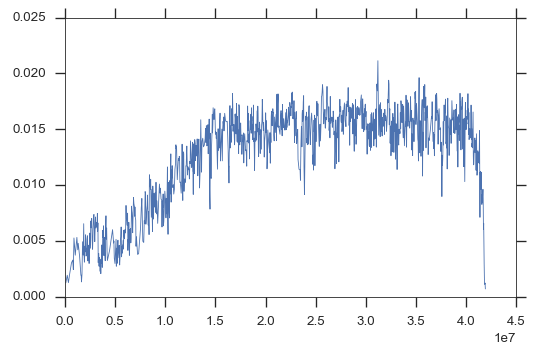

In [143]:
pi, _, _, _ = allel.stats.windowed_diversity(pos_subset, ac, windows=windows, is_accessible=is_accessible)
x = np.mean(windows, axis=1)
y = pi
plt.plot(x, y);

## okay, now let's try the full dictionary

In [146]:
len(subpops)

18

In [147]:
def compute_subpops_ac():
    for chrom in '3L',:
        
        log(chrom, 'load genotypes')
        genotype = allel.GenotypeChunkedArray(callset[chrom]['calldata']['genotype'])
        
        log(chrom, 'count alleles')
        subpops_ac = genotype.count_alleles_subpops(subpops, max_allele=3)
        
        return subpops_ac
    
        log(chrom, 'all done')
        
full_dict_ac = compute_subpops_ac()

2016-12-21 18:33:27.638822 :: 3L load genotypes
2016-12-21 18:33:27.647198 :: 3L count alleles


In [148]:
ac = full_dict_ac['CMS'].subset(sel0 = filter_pass, sel1=None)

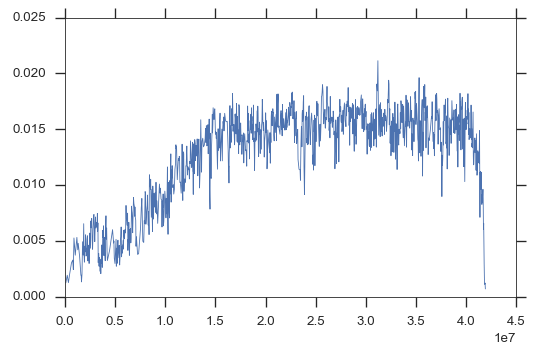

In [149]:
pi, _, _, _ = allel.stats.windowed_diversity(pos_subset, ac, windows=windows, is_accessible=is_accessible)
x = np.mean(windows, axis=1)
y = pi
plt.plot(x, y);